In [25]:
from google.colab import files
uploaded = files.upload()

Saving ecommerce_orders.csv to ecommerce_orders.csv


Missing Values Per Column:
Order_ID            0
Product_Category    2
Product_Price       2
Order_Date          2
Shipment_Date       3
dtype: int64

Percentage of Missing Values:
Order_ID             0.0
Product_Category    20.0
Product_Price       20.0
Order_Date          20.0
Shipment_Date       30.0
dtype: float64


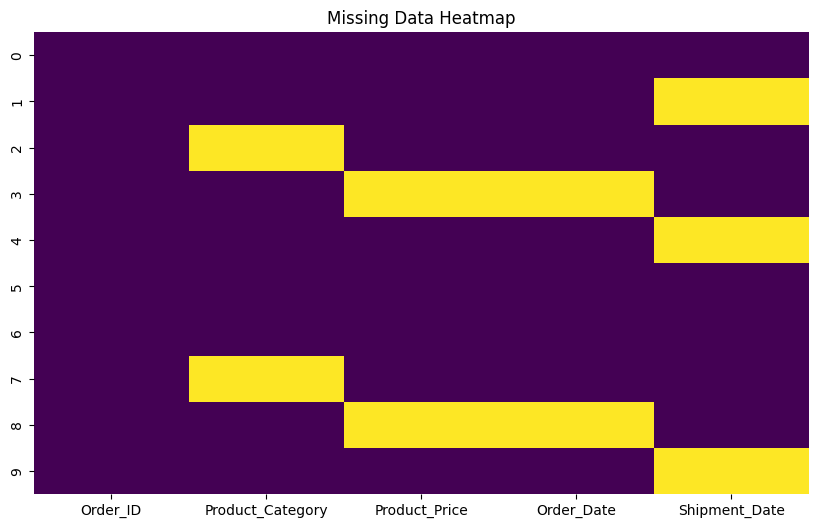

<ipython-input-27-e421d592663e>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Product_Price"].fillna(df["Product_Price"].median(), inplace=True)
<ipython-input-27-e421d592663e>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

Summary Statistics Before Imputation:
         Order_ID  Product_Price
count    10.00000      10.000000
mean   1005.50000     474.000000
std       3.02765     509.366709
min    1001.00000      45.000000
25%    1003.25000     113.750000
50%    1005.50000     240.000000
75%    1007.75000     887.500000
max    1010.00000    1300.000000


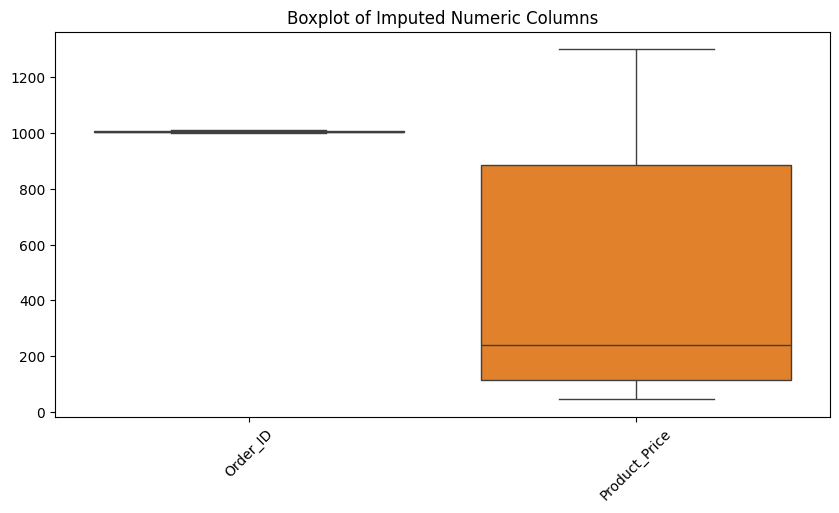

Dataset cleaning complete. Ready for submission.


In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# Load the dataset
df = pd.read_csv("ecommerce_orders.csv")  # Replace with actual dataset path

# Identify missing data
print("Missing Values Per Column:")
print(df.isna().sum())

# Compute percentage of missing values
missing_percent = (df.isna().sum() / len(df)) * 100
print("\nPercentage of Missing Values:")
print(missing_percent)

# Analyze missing data patterns
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cmap="viridis", cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

# Handling missing values
# Mean/Median imputation for numerical columns
df["Product_Price"].fillna(df["Product_Price"].median(), inplace=True)

# Mode imputation for categorical columns
df["Product_Category"].fillna(df["Product_Category"].mode()[0], inplace=True)

# Forward fill or backward fill for date-related fields
df["Order_Date"].fillna(method='ffill', inplace=True)

# KNN imputation for complex cases
knn_imputer = KNNImputer(n_neighbors=5)
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = knn_imputer.fit_transform(df[numeric_columns])

# Evaluate the impact
print("Summary Statistics Before Imputation:")
print(df.describe())

# Visualize imputed values
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[numeric_columns])
plt.title("Boxplot of Imputed Numeric Columns")
plt.xticks(rotation=45)
plt.show()

# Save the cleaned dataset
df.to_csv("cleaned_ecommerce_orders.csv", index=False)

print("Dataset cleaning complete. Ready for submission.")
